In [18]:
import backproject
import id_generation
import numpy as np
import glob
import cv2
import torch
import matplotlib.pyplot as plt

In [19]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [20]:
path_to_traj = "/home/koerner/Project/nice-slam/Datasets/generated/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)

In [21]:
directory = "/home/koerner/Project/nice-slam/Datasets/generated/room0/results"
every_frame= 5

In [22]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [23]:

# color_paths = sorted(glob.glob('/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame*.jpg'))
depth_paths = sorted(
    glob.glob(
        "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/depth*.png"
    )
)
frame_paths=sorted(glob.glob("/home/koerner/Project/nice-slam/Datasets/generated/room0/results/frame*.jpg"))

seg_paths = sorted(
    glob.glob(
        "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic*.npy"
    )
)
print(len(seg_paths))

41


In [24]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

In [25]:
first = np.load(
    "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000000.npy"
)
segmentations = []
segmentations.append(first)
np.unique(first)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85], dtype=int32)

In [26]:
id_counter = len(np.unique(first))
id_counter

86

In [27]:
#np.save(store_path + "/seg000000.npy", first)

In [28]:
#sam Predict
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from id_generation import createReverseMapping
from backproject import generateIds

In [29]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [30]:


sam_checkpoint = "/home/koerner/Project/nice-slam/sam/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

image=cv2.imread(frame_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#masks = mask_generator.generate(image)
#masks2= mask_generator.generate(image2)
input_point = np.array([[500, 375]])
input_label = np.array([1])
'''
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
'''
depthf = readDepth(depth_paths[0])
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds


At iteration 0
0
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000000.npy
At iteration 5
1
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000005.npy


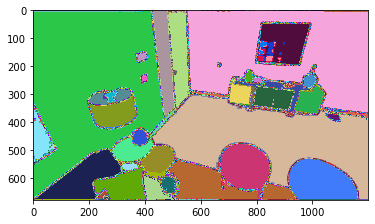

At iteration 10
2
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000010.npy


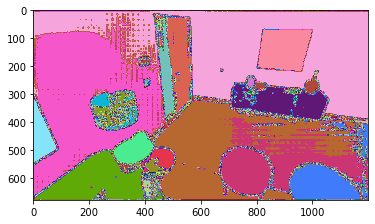

At iteration 15
3
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000015.npy


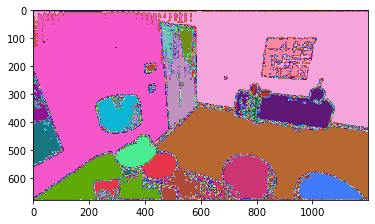

At iteration 20
4
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000020.npy


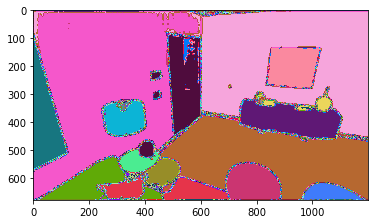

At iteration 25
5
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000025.npy


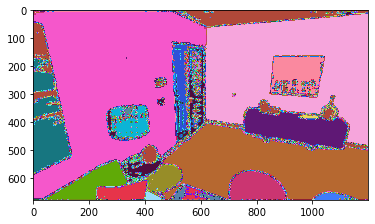

At iteration 30
6
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000030.npy


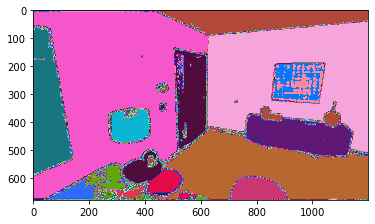

At iteration 35
7
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000035.npy


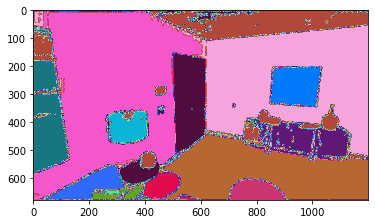

At iteration 40
8
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000040.npy


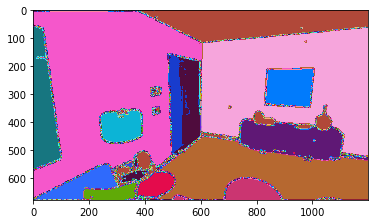

At iteration 45
9
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000045.npy


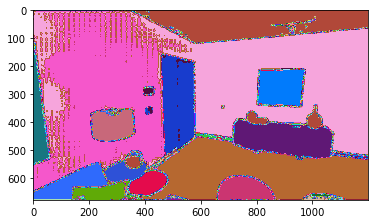

In [31]:

#ä weighing

visualizerForId = visualizerForIds()
'''visualizerForId.visualizer(first)
visualizerForId.visualizer(ids_curr)
visualizerForId.visualizer(ids_curr)'''
frame_numbers = []
every_frame= 5
ppi = 5
segmentations = []
segmentations.append(first)
id_counter = len(np.unique(first))
every_frame= 5


for i in range(0, 50, every_frame):
    print(f'At iteration {i}')
    print(int(i/every_frame))
    print(seg_paths[int(i/every_frame)])
    if(i==0):
        ids_curr = np.load(seg_paths[int(i/every_frame)])
        segmentations.append(ids_curr)
        frame_numbers.append(i)
        continue
    # frame_paths read image
    image=cv2.imread(frame_paths[i])
    imagNext=cv2.imread(frame_paths[i+5])
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imageNext = cv2.cvtColor(imagNext, cv2.COLOR_BGR2RGB)
    ids_curr = np.load(seg_paths[int(i/every_frame)])
    
    segmentationCurr = id_generation.createReverseMapping(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter,predictor, points_per_instance = ppi, current_frame=imageNext)
    segmentations.append(segmentationCurr)
    
    '''plt.figure(figsize=(10,10))
    plt.imshow(imageNext)
    show_mask(segmentationCurr, plt.gca())
    plt.axis('off')
    plt.show() '''
    visualizerForId.visualizer(segmentationCurr)
    #save output
    frame_numbers=[i-5]
torch.cuda.empty_cache()



NameError: name 'masks' is not defined

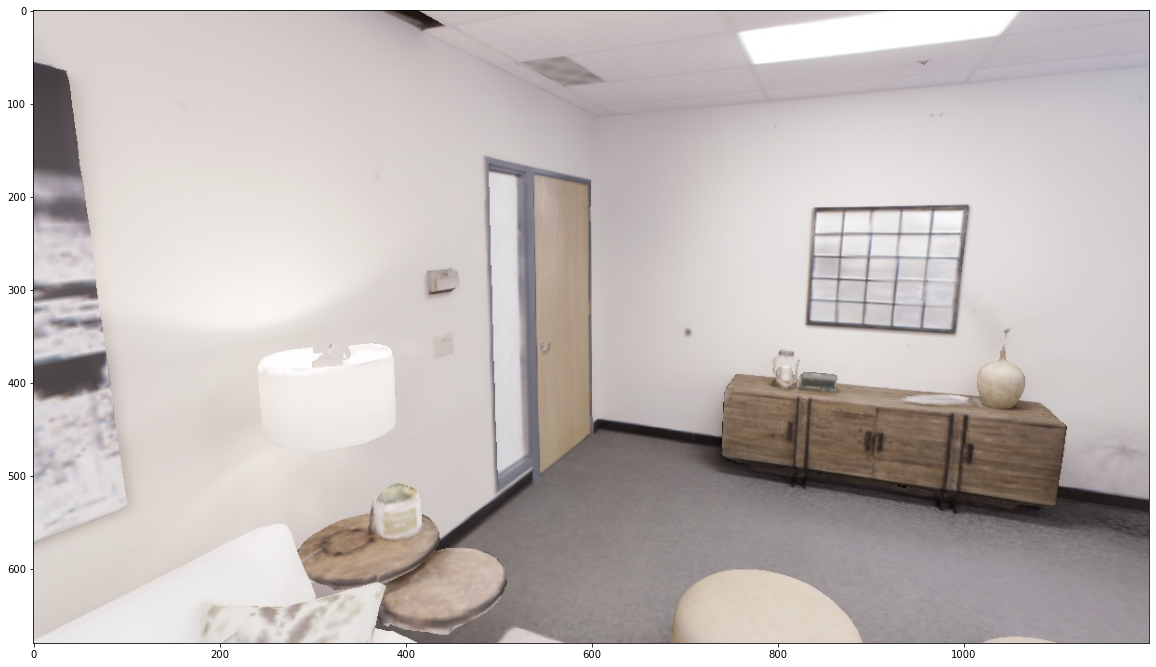

In [32]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis("off")
plt.show()

In [33]:

#ä weighing
for i in range(0, 50, every_frame):
    print(f'At iteration {i}')
    print(int(i/every_frame))
    print(seg_paths[int(i/every_frame)])
    if(i==0):
        ids_curr = np.load(seg_paths[int(i/every_frame)])
        segmentations.append(ids_curr)
        frame_numbers.append(i)
        continue
    ids_curr = np.load(seg_paths[int(i/every_frame)])
    map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = ppi)
    ids = id_generation.update_current_frame(ids_curr, map)
    segmentations.append(ids)
    #save output
    frame_numbers.append(i)
    print(f'Frame numbers: {frame_numbers}')
    
    


At iteration 0
0
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000000.npy
At iteration 5
1
/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000005.npy
max_id 86


87
87
[[ 76.  82.  76.  76.  85.  84.  82.  86.  87.  76.  88.  81.  89.  73.
    7.  83.  80.  73.  49.  76.  76.  64.  75.  76.  78.  81.  82.  90.
   81.   0.  91.  92.  81.  93.   1.  49.  49.   0.  94.  95.   0.   1.
   96.  81.  76.   0.  75.   0.  80.   0.  80.  97.  80.  80.  80.  80.
    0.  80.  80.  80.  80.  98.  80.   0.  80.  99.  80.   0.  80.  80.
   80.  80.  80.  80.  80.  80.  80.  80.  80. 100.  76.  84.   0. 101.
  102.  76.  81.]]
[ 76.  82.  76.  76.  85.  84.  82.  86.  87.  76.  88.  81.  89.  73.
   7.  83.  80.  73.  49.  76.  76.  64.  75.  76.  78.  81.  82.  90.
  81.   0.  91.  92.  81.  93.   1.  49.  49.   0.  94.  95.   0.   1.
  96.  81.  76.   0.  75.   0.  80.   0.  80.  97.  80.  80.  80.  80.
   0.  80.  80.  80.  80.  98.  80.   0.  80.  99.  80.   0.  80.  80.
  80.  80.  80.  80.  80.  80.  80.  80.  80. 100.  76.  84.   0. 101.
 102.  76.  81.]
Frame numbers: [40, 0, 5]
At iteration 10
2
/home/koerner/Project/nice-slam/Datasets/generated/room0

In [34]:
'''for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()'''

"for segment in segmentations:\n    plt.imshow(segment,cmap='plasma',interpolation='nearest')\n    plt.show()"

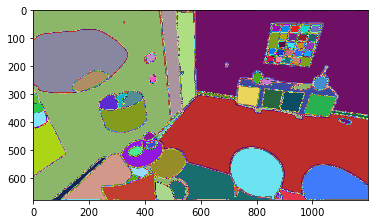

0


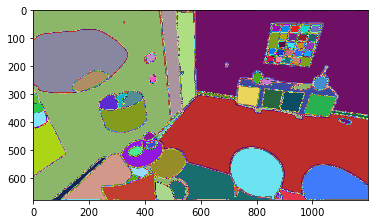

5


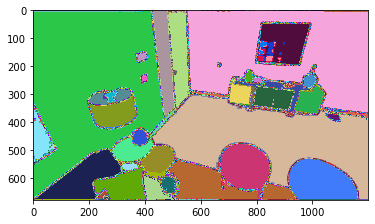

10


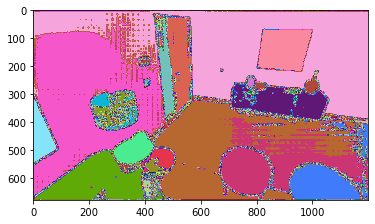

15


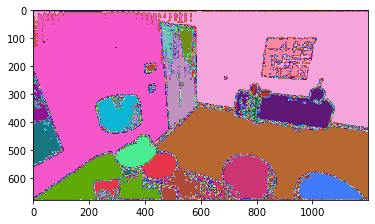

20


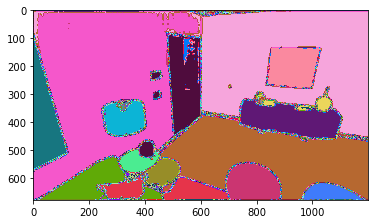

25


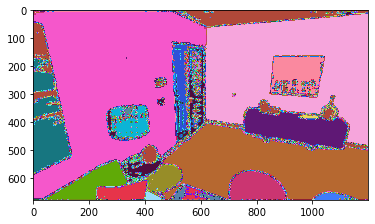

30


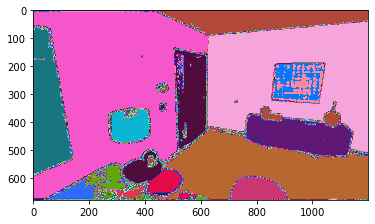

35


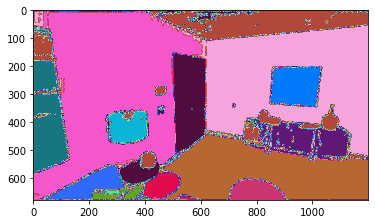

40


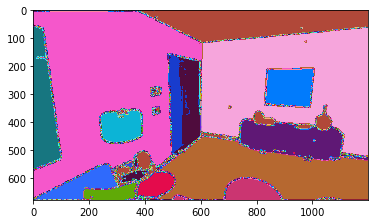

45


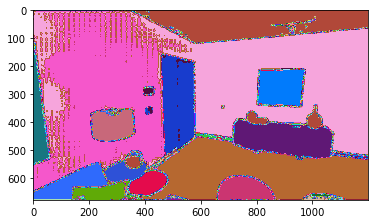

50


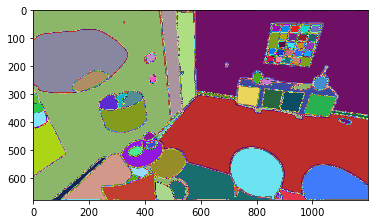

55


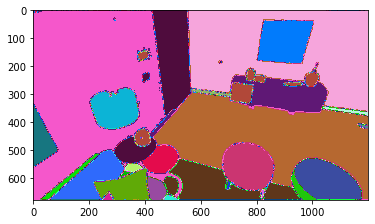

60


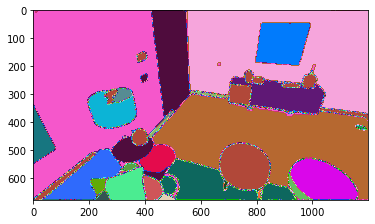

65


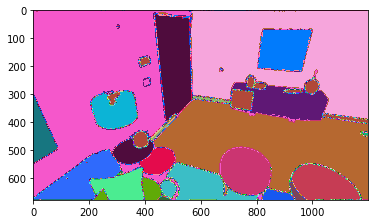

70


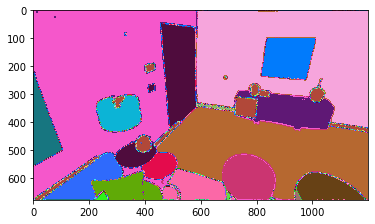

75


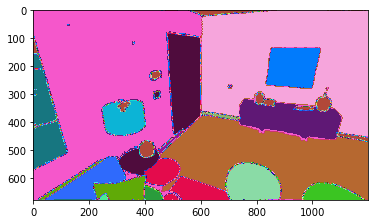

80


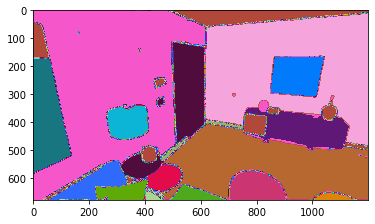

85


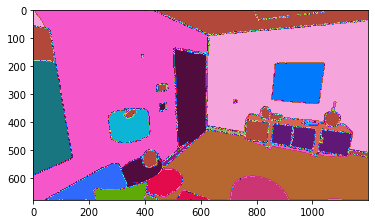

90


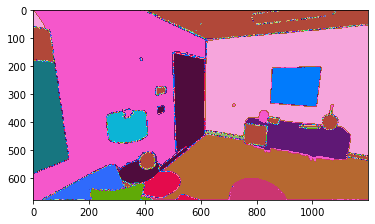

95


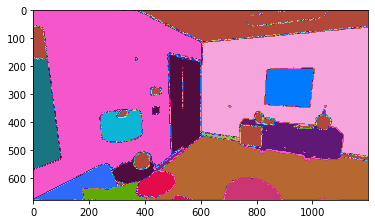

100
513


In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds

visualizerForId = visualizerForIds()
'''visualizerForId.visualizer(first)
visualizerForId.visualizer(ids_curr)
visualizerForId.visualizer(ids_curr)'''
cc=0
for segment in segmentations:
    visualizerForId.visualizer(segment)
    print(cc)
    cc+=5
'''visualizerForId.visualizer(ids)'''
print(np.max(segmentations[-1]))

In [36]:
segmentations.append(ids)
#save output
frame_numbers.append(i)

In [37]:
i = 10

ids_curr = np.load(seg_paths[int(i/every_frame)])
np.unique(ids_curr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86], dtype=int32)

In [38]:
map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = 1000)

max_id 86


87
87
87
87
87
87
87
87
87
87
87
87
[[ 20.   1.   4.   4.   5.   1.  40.  40.  19.  10.   5.   5. 687.  17.
   12.   4.  16.   1.  16.   5.  22.  20.  22.  17.  35.  21.  16.   5.
   22.   1.  22.   5.   5.   5.   5.   1.   5.  23. 688.  17.  16.   5.
    5.   5.   5.  25.  16.  44. 689.  17.   5. 690.   1.   4.  23.  -1.
    4.   5.   4.   4.   4.   4.   5.   9.   4.   4.   1.   9.   4.  23.
   29.   1.  29.  29.   9.  29.  29.  32.   9.  29.  32.   1.   5. 691.
  692. 693.   5.]]
[ 20.   1.   4.   4.   5.   1.  40.  40.  19.  10.   5.   5. 687.  17.
  12.   4.  16.   1.  16.   5.  22.  20.  22.  17.  35.  21.  16.   5.
  22.   1.  22.   5.   5.   5.   5.   1.   5.  23. 688.  17.  16.   5.
   5.   5.   5.  25.  16.  44. 689.  17.   5. 690.   1.   4.  23.  -1.
   4.   5.   4.   4.   4.   4.   5.   9.   4.   4.   1.   9.   4.  23.
  29.   1.  29.  29.   9.  29.  29.  32.   9.  29.  32.   1.   5. 691.
 692. 693.   5.]


In [39]:
ids = id_generation.update_current_frame(ids_curr, map)

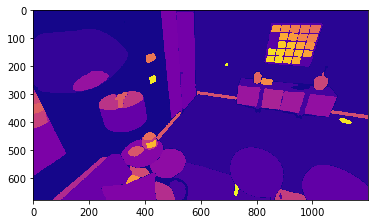

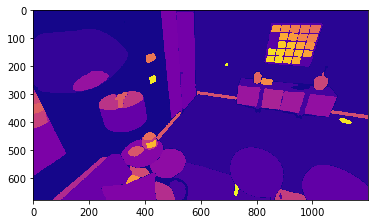

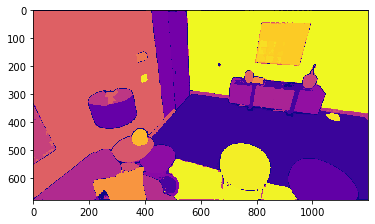

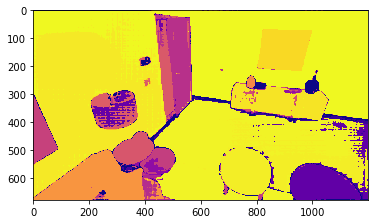

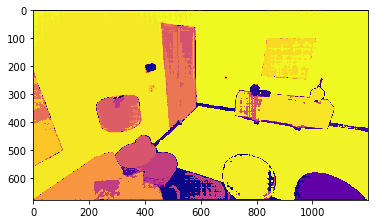

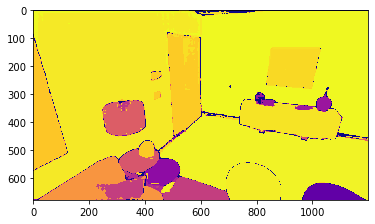

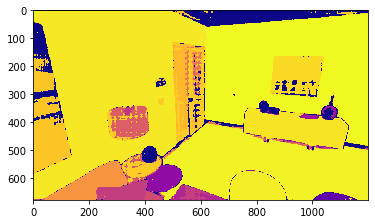

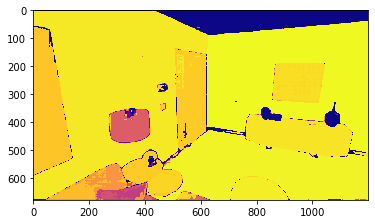

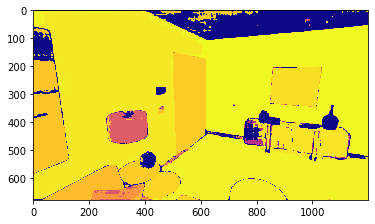

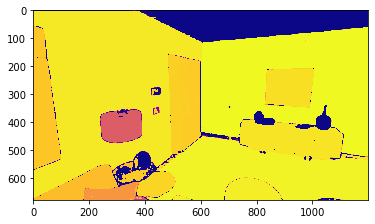

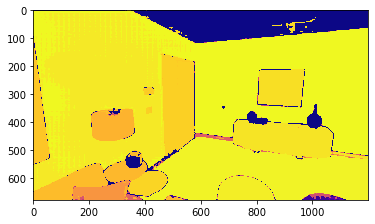

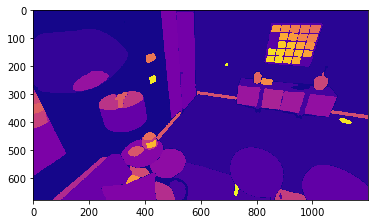

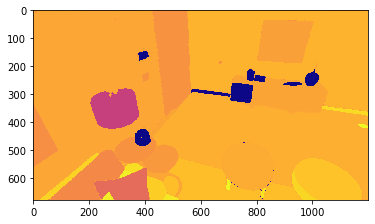

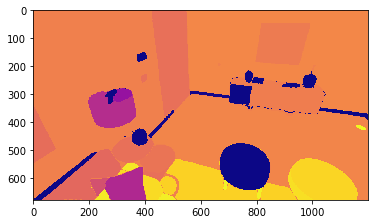

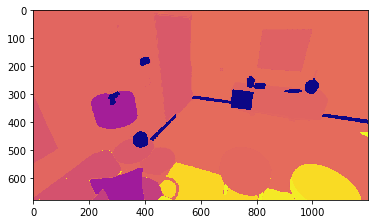

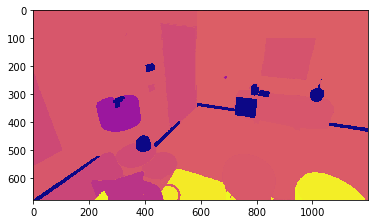

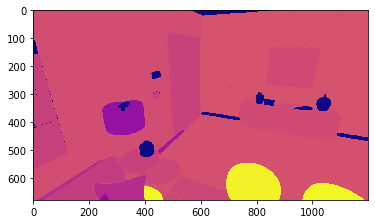

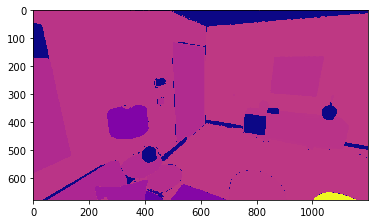

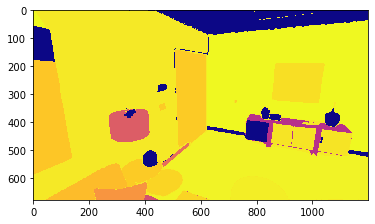

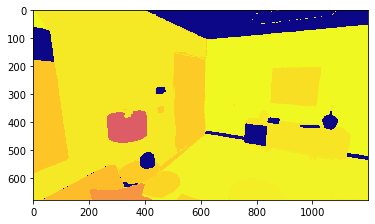

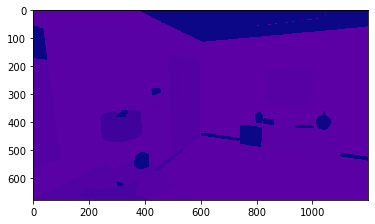

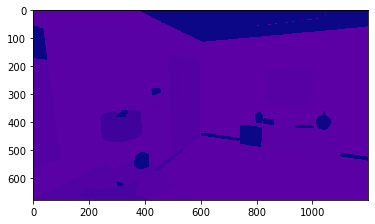

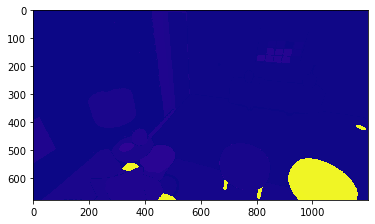

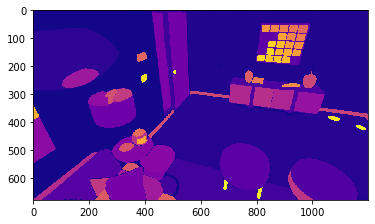

In [40]:
for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()

plt.imshow(ids,cmap='plasma',interpolation='nearest')
plt.show()
plt.imshow(ids_curr,cmap='plasma',interpolation='nearest')

In [41]:
segmentations[0][400,300],segmentations[1][420,300]

(16, 16)